In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
directory = '../dataset/'
ori_name = ['AMD.csv', 'FB.csv', 'FSV.csv', 'INFY.csv', 'KNX.csv',
          'MONDY.csv', 'MTDR.csv', 'SINA.csv', 'TMUS.csv', 'TSLA.csv', 'TWTR.csv']
stocks = [directory + s for s in ori_name]
stocks

['../dataset/AMD.csv',
 '../dataset/FB.csv',
 '../dataset/FSV.csv',
 '../dataset/INFY.csv',
 '../dataset/KNX.csv',
 '../dataset/MONDY.csv',
 '../dataset/MTDR.csv',
 '../dataset/SINA.csv',
 '../dataset/TMUS.csv',
 '../dataset/TSLA.csv',
 '../dataset/TWTR.csv']

In [3]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [4]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close
0,16.270000,207.320007,78.820000,9.710,37.910000,56.889999,31.809999,84.070000,61.680000,318.869995,44.490002
1,16.580000,207.229996,78.250000,9.800,36.360001,56.639999,31.670000,83.949997,61.630001,310.100006,44.259998
2,16.870001,209.990005,77.940002,9.950,36.279999,57.730000,32.020000,84.870003,61.209999,322.690002,44.709999
3,16.850000,209.360001,77.940002,9.840,37.500000,57.810001,31.740000,83.989998,60.520000,323.850006,43.340000
4,16.709999,208.089996,78.055000,9.855,37.990002,52.380001,32.330002,82.940002,59.410000,320.230011,43.439999


In [5]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [6]:
mean_daily_returns * 252

Close_x    0.995185
Close_y   -0.247949
Close_x    0.119677
Close_y    0.190845
Close_x   -0.175416
Close_y   -0.170502
Close_x   -0.626256
Close_y   -0.450914
Close_x    0.252493
Close_y   -0.069273
Close     -0.273753
dtype: float64

In [7]:
volatilities * 252

Close_x    12.196632
Close_y     6.637175
Close_x     3.677834
Close_y     3.572859
Close_x     7.104904
Close_y     7.909165
Close_x     8.121732
Close_y     6.948244
Close_x     3.863498
Close_y    10.213733
Close       8.873234
dtype: float64

In [8]:
combine = pd.DataFrame({'returns': mean_daily_returns * 252,
                       'volatility': volatilities * 252})

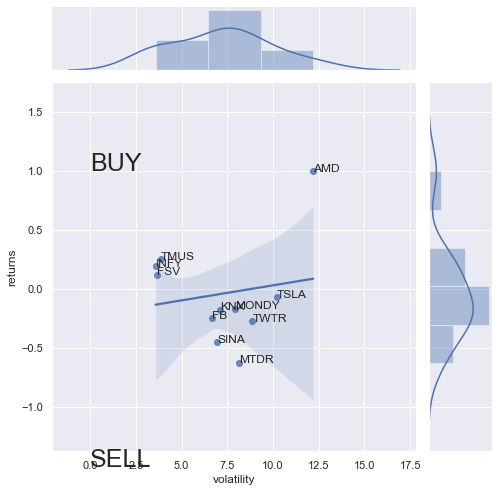

In [9]:
g = sns.jointplot("volatility", "returns", data=combine, kind="reg",height=7)

for i in range(combine.shape[0]):
    plt.annotate(ori_name[i].replace('.csv',''), (combine.iloc[i, 1], combine.iloc[i, 0]))
    
plt.text(0, -1.5, 'SELL', fontsize=25)
plt.text(0, 1.0, 'BUY', fontsize=25)
    
plt.show()